# Exploratory Data Analysis (EDA)
---
1. Shape of the Data
2. Variation of the data: Visualising distributions for categorical (Bar Chart) and continiouse data (Histogram, **binwidth** to explore, overlapping histograms? geom_freqpoly(),)
3. Typical values: Which values are the most common and which are rare, Can one see unusual patterns in the data?
4. Covariation (Of two categorical data (covariation between categorical variables, you’ll need to count the number of observations for each combination. One way to do that is to rely on the built-in geom_count()) , 1 cat and 1 cont (boxplot), two continiouse (**scatter**)
- Identify Significat Correlations (Cov. Matrix)
- ANOVA test?
5. Patterns of the data
6. Statistics of the data (From the Sensor Handbook)

##### Sources:
---
1. https://r4ds.had.co.nz/exploratory-data-analysis.html
2. https://shopify.engineering/conducting-exploratory-data-analysis
3. https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a ****
4. https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
5. https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd



In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [560]:
df=pd.read_csv(r"C:/Users/bkari/Desktop/complete_data.csv",index_col = False)

In [561]:
df = df.iloc[: , 1:]

In [563]:
df.head(5)

RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain  SommerDurumweizen  \
0  13.33    13.0     8.07      1214.0        40.6                1.0   
1  14.17    13.3     6.96      1292.0        40.8                1.0   
2  12.81    13.8     6.14      1427.0        40.5                1.0   
3  12.79    12.9     8.18      1230.0        42.1                1.0   
4  13.03    13.6     7.24      1392.0        41.9                1.0   

   SommerGerste  Weizen  WinterDurumweizen  WinterGerste  WinterRaps  \
0           0.0     0.0                0.0           0.0         0.0   
1           0.0     0.0                0.0           0.0         0.0   
2           0.0     0.0                0.0           0.0         0.0   
3           0.0     0.0                0.0           0.0         0.0   
4           0.0     0.0                0.0           0.0         0.0   

   WinterRoggen  WinterTriticale  WinterWeizen  
0           0.0              0.0           0.0  
1           0.0              0.0           0.0  
2           0.0              0.0           0.0  
3           0.0              0.0           0.0  
4           0.0              0.0           0.0

##### 1 Shape of the data

In [134]:
df.shape

(8251, 14)

In [565]:
df.value_counts(df.dtypes)

Series([], dtype: int64)

In [566]:
df.describe()

RefSt       Sensor      Gewicht   Raw_Feucht   Temp_grain  \
count  8251.000000  8251.000000  8251.000000  8251.000000  8251.000000   
mean     12.987320    11.712689     9.540665  1038.823052    39.313392   
std       1.927868     1.483371     2.832603   245.012550     3.932517   
min       6.620000     5.000000     0.880000   497.000000    24.800000   
25%      12.150000    11.000000     7.740000   870.000000    36.700000   
50%      12.850000    11.700000     9.710000  1013.000000    39.700000   
75%      13.750000    12.600000    11.310000  1156.000000    42.000000   
max      27.680000    23.500000    40.300000  2831.000000    50.400000   

       SommerDurumweizen  SommerGerste       Weizen  WinterDurumweizen  \
count        8251.000000   8251.000000  8251.000000        8251.000000   
mean            0.063507      0.138650     0.008241           0.052357   
std             0.243888      0.345602     0.090413           0.222760   
min             0.000000      0.000000     0.000000           0.000000   
25%             0.000000      0.000000     0.000000           0.000000   
50%             0.000000      0.000000     0.000000           0.000000   
75%             0.000000      0.000000     0.000000           0.000000   
max             1.000000      1.000000     1.000000           1.000000   

       WinterGerste   WinterRaps  WinterRoggen  WinterTriticale  WinterWeizen  
count   8251.000000  8251.000000   8251.000000      8251.000000   8251.000000  
mean       0.129318     0.045085      0.078778         0.040722      0.443340  
std        0.335572     0.207504      0.269409         0.197658      0.496809  
min        0.000000     0.000000      0.000000         0.000000      0.000000  
25%        0.000000     0.000000      0.000000         0.000000      0.000000  
50%        0.000000     0.000000      0.000000         0.000000      0.000000  
75%        0.000000     0.000000      0.000000         0.000000      1.000000  
max        1.000000     1.000000      1.000000         1.000000      1.000000

In [567]:
change=df.iloc[:,5:].replace([0,1],['NO','YES'])

In [568]:
df[change.columns]=change

In [569]:
df

RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain SommerDurumweizen  \
0     13.33    13.0     8.07      1214.0        40.6               YES   
1     14.17    13.3     6.96      1292.0        40.8               YES   
2     12.81    13.8     6.14      1427.0        40.5               YES   
3     12.79    12.9     8.18      1230.0        42.1               YES   
4     13.03    13.6     7.24      1392.0        41.9               YES   
...     ...     ...      ...         ...         ...               ...   
8246  14.16    12.5    10.74      1175.0        35.6                NO   
8247  12.73    11.5     9.56       898.0        35.9                NO   
8248  14.99    13.3    12.27      1380.0        35.7                NO   
8249  20.28    18.5    13.33      2482.0        35.6                NO   
8250  12.32    11.6     9.69       916.0        35.2                NO   

     SommerGerste Weizen WinterDurumweizen WinterGerste WinterRaps  \
0              NO     NO                NO           NO         NO   
1              NO     NO                NO           NO         NO   
2              NO     NO                NO           NO         NO   
3              NO     NO                NO           NO         NO   
4              NO     NO                NO           NO         NO   
...           ...    ...               ...          ...        ...   
8246           NO     NO                NO           NO         NO   
8247           NO     NO                NO           NO         NO   
8248           NO     NO                NO           NO         NO   
8249           NO     NO                NO           NO         NO   
8250           NO     NO                NO           NO         NO   

     WinterRoggen WinterTriticale WinterWeizen  
0              NO              NO           NO  
1              NO              NO           NO  
2              NO              NO           NO  
3              NO              NO           NO  
4              NO              NO           NO  
...           ...             ...          ...  
8246           NO              NO          YES  
8247           NO              NO          YES  
8248           NO              NO          YES  
8249           NO              NO          YES  
8250           NO              NO          YES  

[8251 rows x 14 columns]

In [140]:
# Value Counts
pd.value_counts(df.dtypes)

object     9
float64    5
dtype: int64

In [141]:
# Structure of non-numerical feutures
small=df.describe(exclude='number')

<AxesSubplot:>

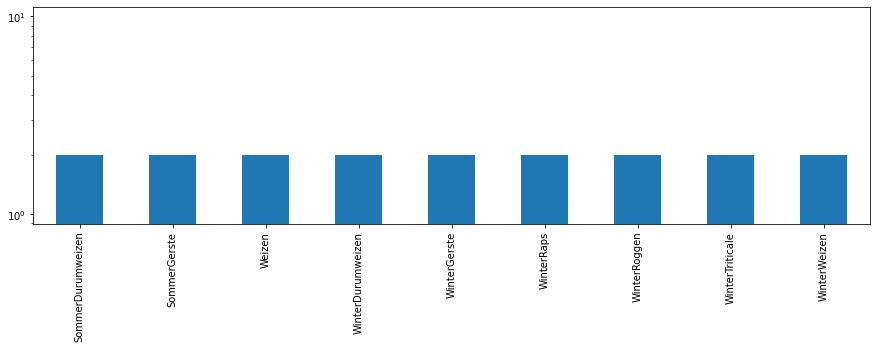

In [142]:
# Structure of non-numerical data
unique_values2=df.select_dtypes(exclude="number").nunique().sort_values()
unique_values2.plot.bar(logy=True, figsize=(15,4))

<AxesSubplot:>

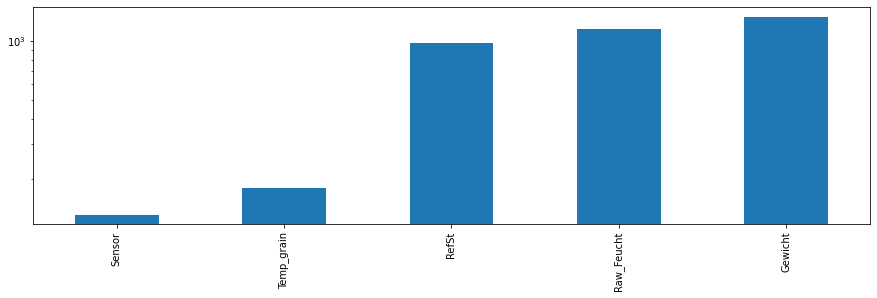

In [143]:
# Structure of numerical feutures (Unique Values per Feuture)

unique_values=df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4))

In [570]:
df['error_abs']=df['RefSt']-df['Sensor']
df['error_prcnt']=((1-(df["Sensor"]/df["RefSt"]))*100)

In [145]:
df

RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain SommerDurumweizen  \
0     13.33    13.0     8.07      1214.0        40.6               YES   
1     14.17    13.3     6.96      1292.0        40.8               YES   
2     12.81    13.8     6.14      1427.0        40.5               YES   
3     12.79    12.9     8.18      1230.0        42.1               YES   
4     13.03    13.6     7.24      1392.0        41.9               YES   
...     ...     ...      ...         ...         ...               ...   
8246  14.16    12.5    10.74      1175.0        35.6                NO   
8247  12.73    11.5     9.56       898.0        35.9                NO   
8248  14.99    13.3    12.27      1380.0        35.7                NO   
8249  20.28    18.5    13.33      2482.0        35.6                NO   
8250  12.32    11.6     9.69       916.0        35.2                NO   

     SommerGerste Weizen WinterDurumweizen WinterGerste WinterRaps  \
0              NO     NO                NO           NO         NO   
1              NO     NO                NO           NO         NO   
2              NO     NO                NO           NO         NO   
3              NO     NO                NO           NO         NO   
4              NO     NO                NO           NO         NO   
...           ...    ...               ...          ...        ...   
8246           NO     NO                NO           NO         NO   
8247           NO     NO                NO           NO         NO   
8248           NO     NO                NO           NO         NO   
8249           NO     NO                NO           NO         NO   
8250           NO     NO                NO           NO         NO   

     WinterRoggen WinterTriticale WinterWeizen  error_abs  error_prcnt  
0              NO              NO           NO       0.33     2.475619  
1              NO              NO           NO       0.87     6.139732  
2              NO              NO           NO      -0.99    -7.728337  
3              NO              NO           NO      -0.11    -0.860047  
4              NO              NO           NO      -0.57    -4.374520  
...           ...             ...          ...        ...          ...  
8246           NO              NO          YES       1.66    11.723164  
8247           NO              NO          YES       1.23     9.662215  
8248           NO              NO          YES       1.69    11.274183  
8249           NO              NO          YES       1.78     8.777120  
8250           NO              NO          YES       0.72     5.844156  

[8251 rows x 16 columns]

In [146]:
df.describe()

RefSt       Sensor      Gewicht   Raw_Feucht   Temp_grain  \
count  8251.000000  8251.000000  8251.000000  8251.000000  8251.000000   
mean     12.987320    11.712689     9.540665  1038.823052    39.313392   
std       1.927868     1.483371     2.832603   245.012550     3.932517   
min       6.620000     5.000000     0.880000   497.000000    24.800000   
25%      12.150000    11.000000     7.740000   870.000000    36.700000   
50%      12.850000    11.700000     9.710000  1013.000000    39.700000   
75%      13.750000    12.600000    11.310000  1156.000000    42.000000   
max      27.680000    23.500000    40.300000  2831.000000    50.400000   

         error_abs  error_prcnt  
count  8251.000000  8251.000000  
mean      1.274631     9.230711  
std       1.183983     7.872776  
min     -11.910000  -102.761001  
25%       0.570000     4.567700  
50%       1.260000     9.774436  
75%       1.860000    14.012739  
max       9.460000    43.275389

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8251 entries, 0 to 8250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RefSt              8251 non-null   float64
 1   Sensor             8251 non-null   float64
 2   Gewicht            8251 non-null   float64
 3   Raw_Feucht         8251 non-null   float64
 4   Temp_grain         8251 non-null   float64
 5   SommerDurumweizen  8251 non-null   object 
 6   SommerGerste       8251 non-null   object 
 7   Weizen             8251 non-null   object 
 8   WinterDurumweizen  8251 non-null   object 
 9   WinterGerste       8251 non-null   object 
 10  WinterRaps         8251 non-null   object 
 11  WinterRoggen       8251 non-null   object 
 12  WinterTriticale    8251 non-null   object 
 13  WinterWeizen       8251 non-null   object 
dtypes: float64(5), object(9)
memory usage: 902.6+ KB


In [103]:
import missingno as msno

<AxesSubplot:>

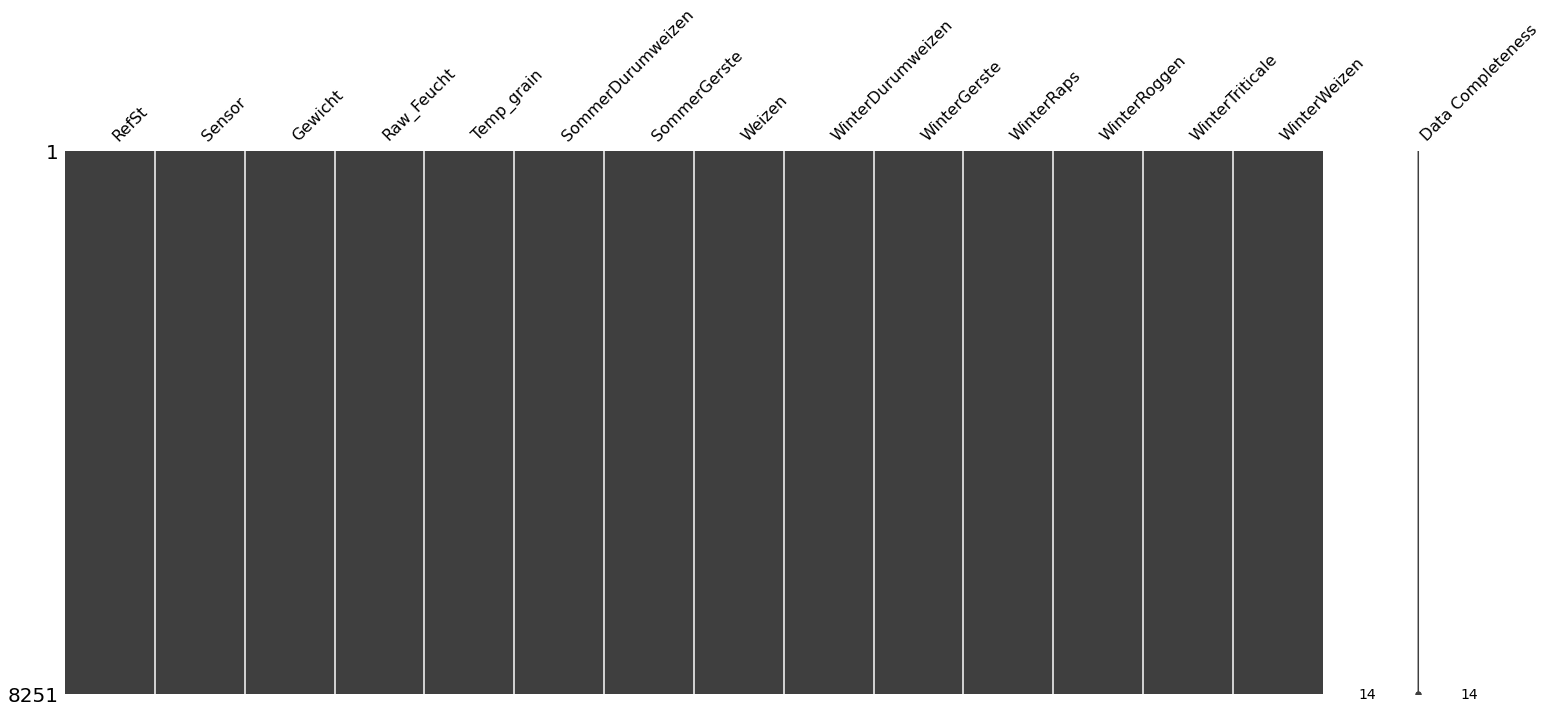

In [107]:
figsize=(10,3)
msno.matrix(df, labels=True, sort="descending")

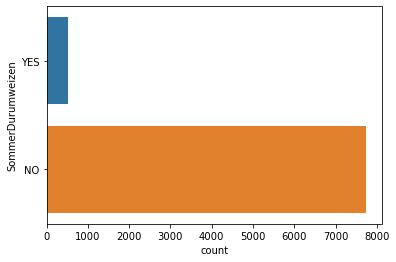

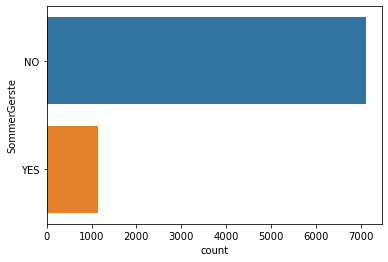

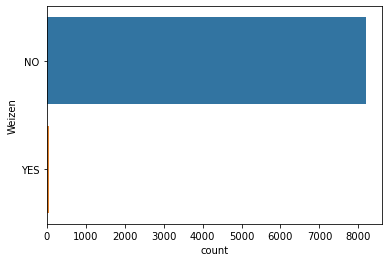

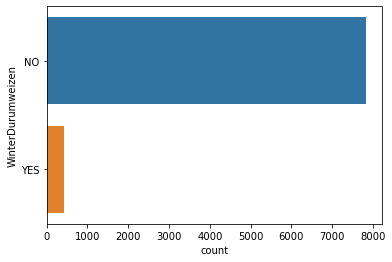

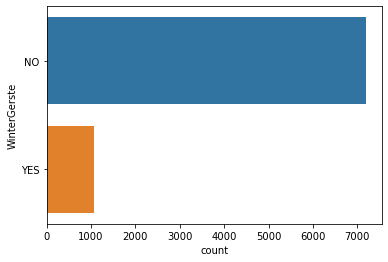

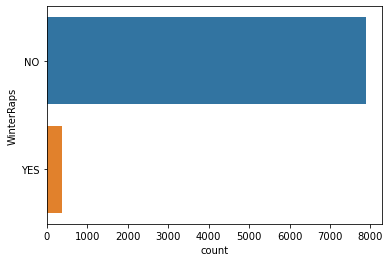

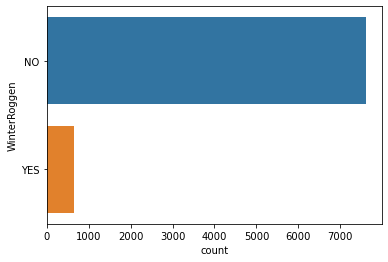

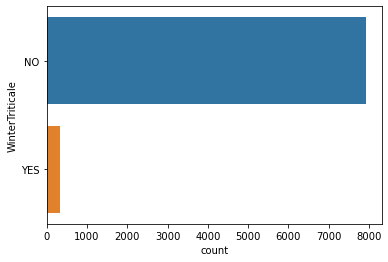

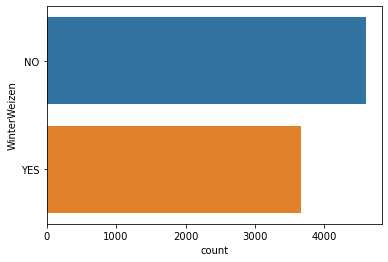

In [156]:
# Count of non-numerical feutures

for column in df.select_dtypes(include='object'):
    sns.countplot(y=column, data=df)
    plt.show()


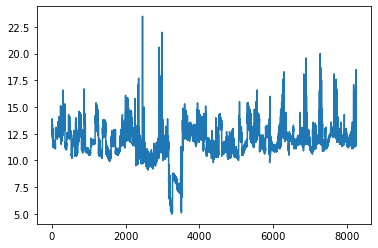

In [161]:
plt.plot(df["Sensor"])

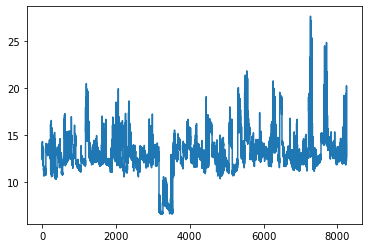

In [162]:
plt.plot(df["RefSt"])

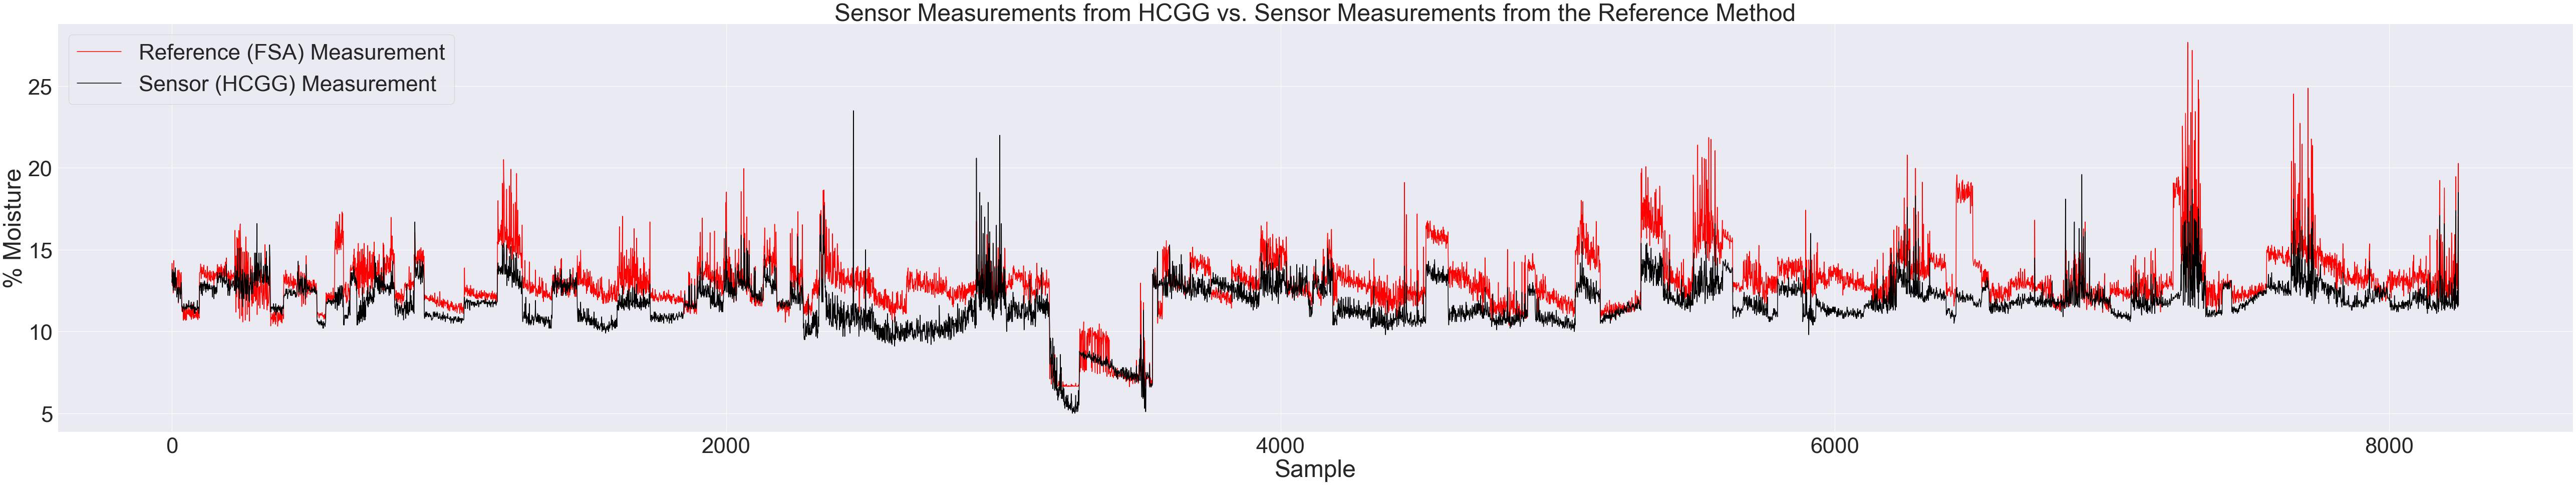

In [216]:

sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'gray'})
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(90,15))
ylim=(0,8251)
ax=sns.lineplot(y="RefSt",x=range(0,8251),data=df, color="red")
sns.lineplot(y="Sensor",x=range(0,8251),data=df, color="black").set(title='Sensor Measurements from HCGG vs. Sensor Measurements from the Reference Method')
plt.legend(labels = ['Reference (FSA) Measurement', 'Sensor (HCGG) Measurement'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

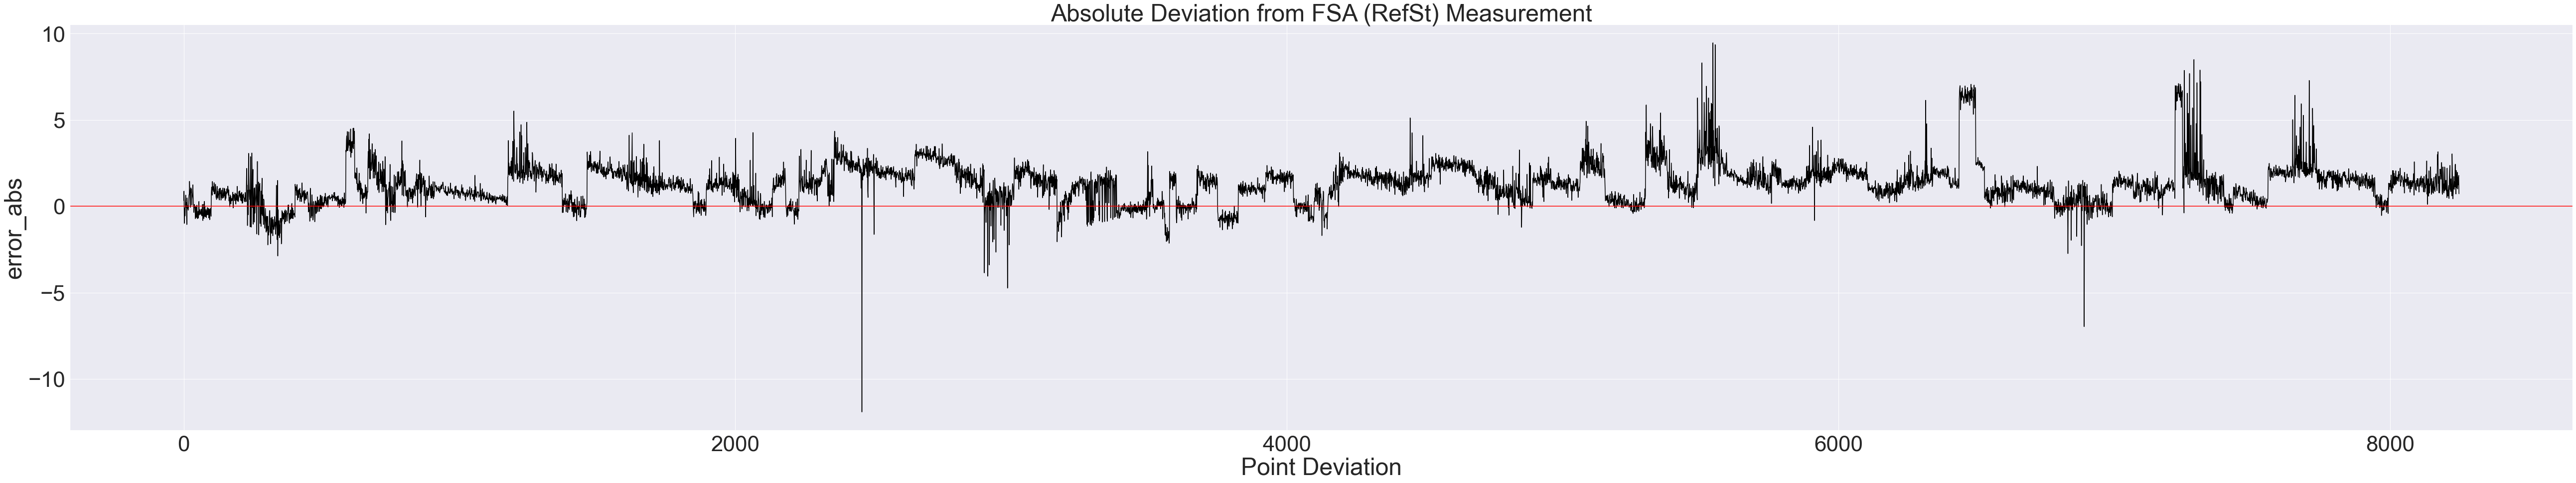

In [253]:
fig, ax = plt.subplots(figsize=(90,15))
graph = sns.lineplot(y="error_abs",x=range(0,8251),data=df, color="black")
plt.title('Absolute Deviation from FSA (RefSt) Measurement')
plt.xlabel("Point Deviation")
graph.axhline(0, color="red")

plt.show()

##### 2 Variation of the data

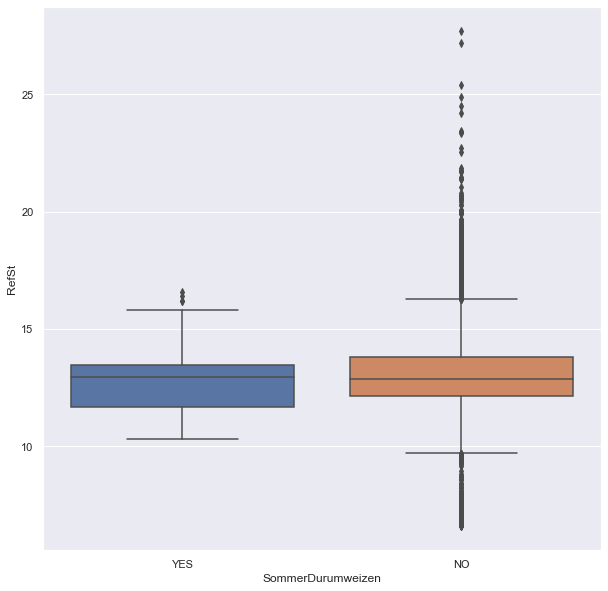

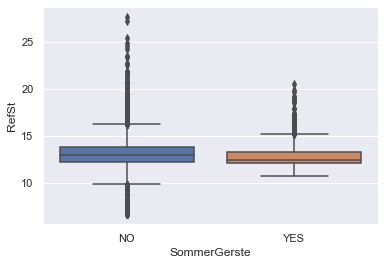

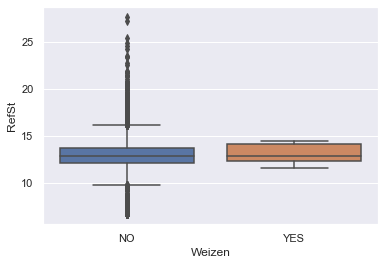

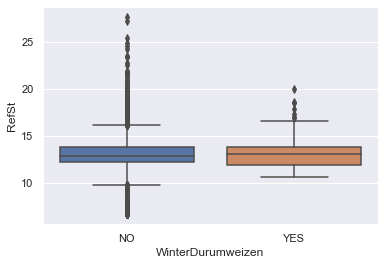

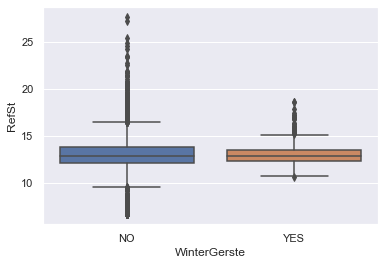

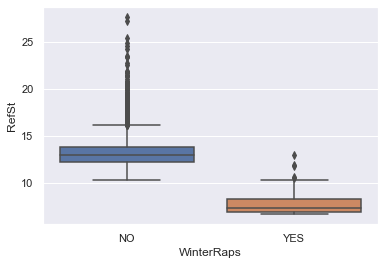

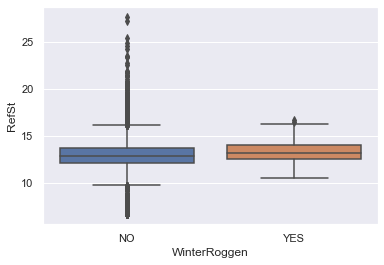

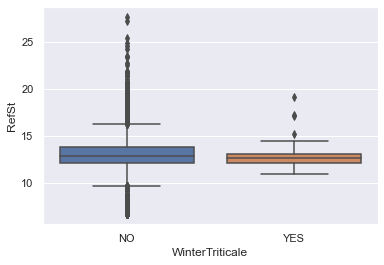

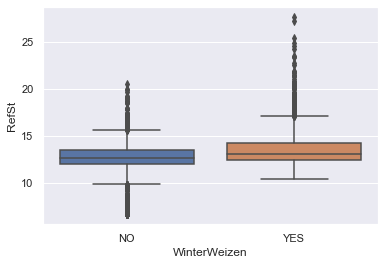

In [274]:
#BoxPlot for the Descrete Variables with respect to RefSt

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)


for column in df.select_dtypes(include='object'):
    sns.boxplot(y="RefSt", x=column, data=df)
    plt.show()


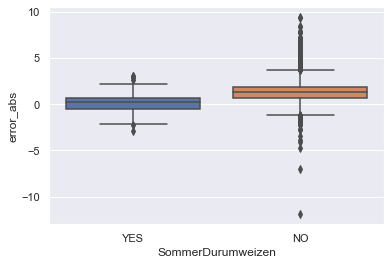

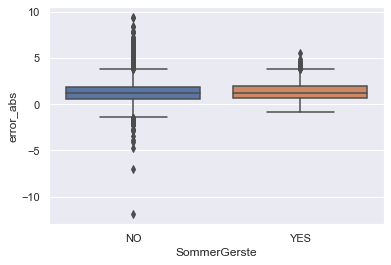

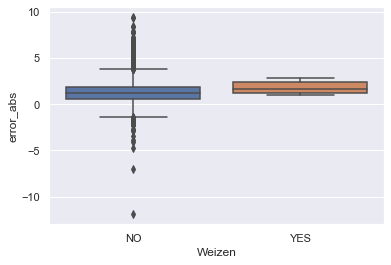

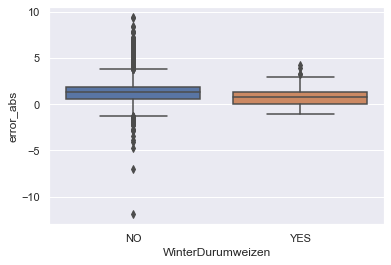

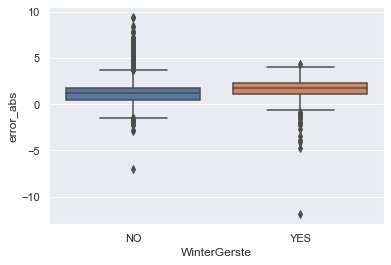

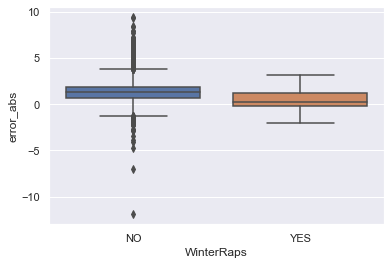

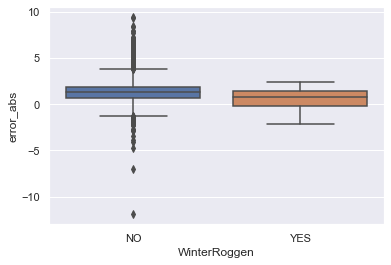

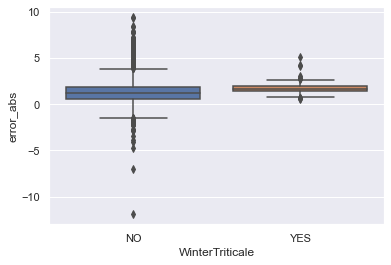

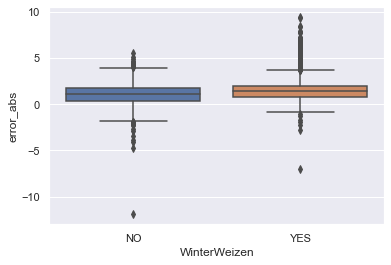

In [314]:
#BoxPlot for the Descrete Variables with respect to ERROR ABS

#fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)


for column in df.select_dtypes(include='object'):
    sns.boxplot(y="error_abs", x=column, data=df)
    plt.show()


In [571]:
# Now when in one column there is a information what kind of corn type is in the line

def f(df):
    if df['SommerDurumweizen'] == 'YES' : return "SommerDurumweizen"
    elif df['SommerGerste'] == 'YES': return "SommerGerste"
    elif df['Weizen'] == 'YES': return "Weizen"
    elif df['WinterDurumweizen'] == 'YES': return "WinterDurumweizen"
    elif df['WinterGerste'] == 'YES': return "WinterGerste"
    elif df['WinterRaps'] == 'YES': return "WinterRaps"
    elif df['WinterRoggen'] == 'YES': return "WinterRoggen"
    elif df['WinterTriticale'] == 'YES': return "WinterTriticale"
    elif df['WinterWeizen'] == 'YES': return "WinterWeizen"
    else: return 0

df['type'] = df.apply(f, axis=1)

In [320]:
df.head(5)

RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain SommerDurumweizen  \
0  13.33    13.0     8.07      1214.0        40.6               YES   
1  14.17    13.3     6.96      1292.0        40.8               YES   
2  12.81    13.8     6.14      1427.0        40.5               YES   
3  12.79    12.9     8.18      1230.0        42.1               YES   
4  13.03    13.6     7.24      1392.0        41.9               YES   

  SommerGerste Weizen WinterDurumweizen WinterGerste WinterRaps WinterRoggen  \
0           NO     NO                NO           NO         NO           NO   
1           NO     NO                NO           NO         NO           NO   
2           NO     NO                NO           NO         NO           NO   
3           NO     NO                NO           NO         NO           NO   
4           NO     NO                NO           NO         NO           NO   

  WinterTriticale WinterWeizen  error_abs  error_prcnt               type  
0              NO           NO       0.33     2.475619  SommerDurumweizen  
1              NO           NO       0.87     6.139732  SommerDurumweizen  
2              NO           NO      -0.99    -7.728337  SommerDurumweizen  
3              NO           NO      -0.11    -0.860047  SommerDurumweizen  
4              NO           NO      -0.57    -4.374520  SommerDurumweizen

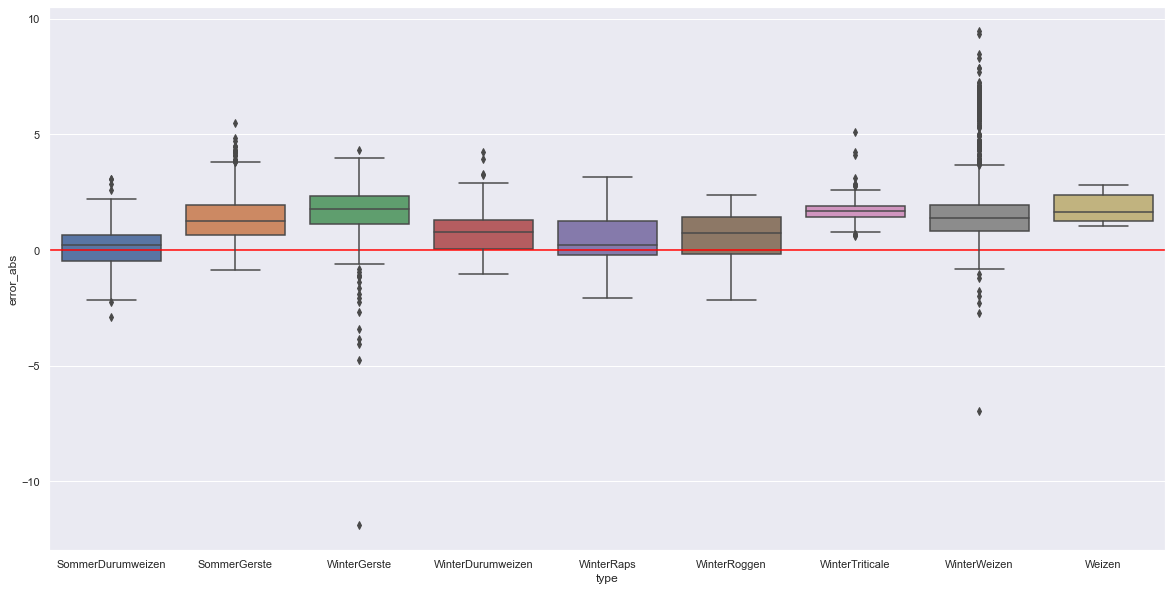

In [327]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,10))
ax.axhline(0, color="red")
sns.boxplot(y="error_abs", x="type", data=df)
plt.show()


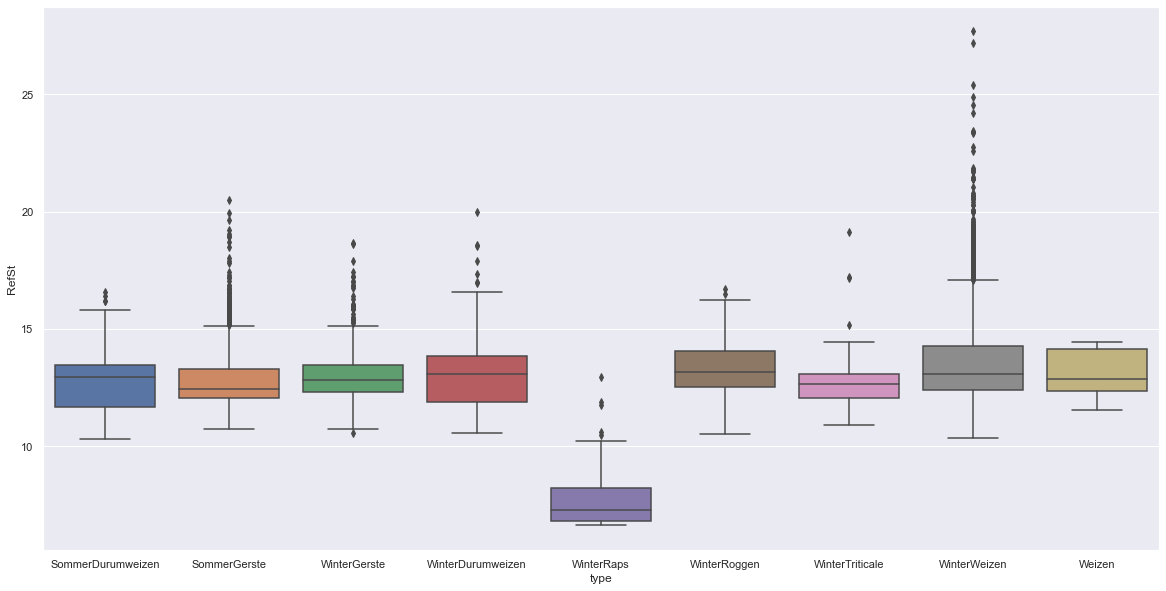

In [328]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y="RefSt", x="type", data=df)

plt.show()


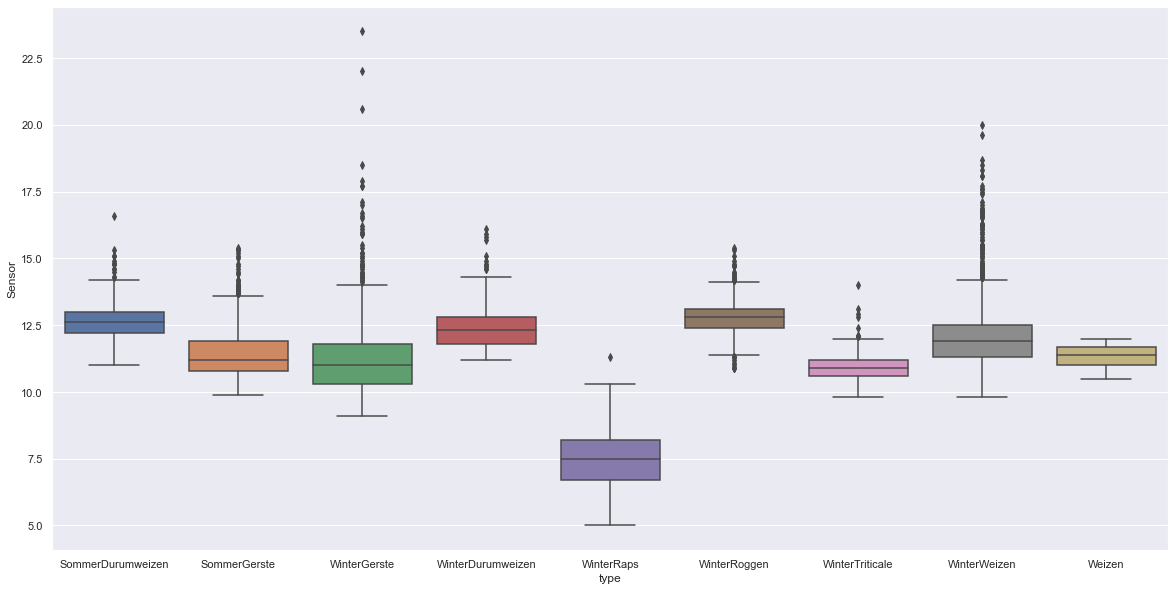

In [329]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y="Sensor", x="type", data=df)

plt.show()


<AxesSubplot:xlabel='Sensor'>

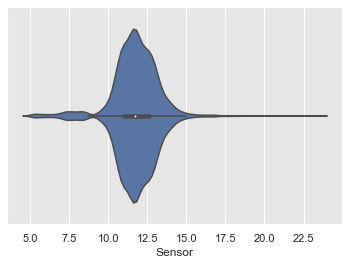

In [396]:
# Violin Plot

sns.violinplot(x=df["Sensor"])

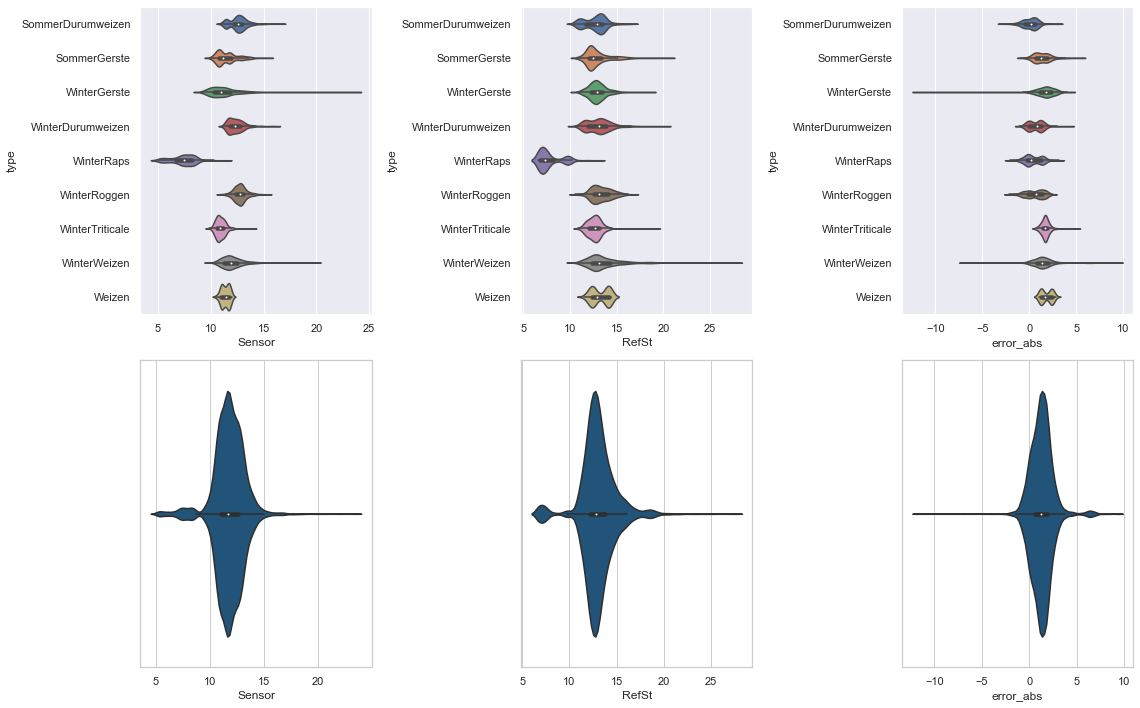

In [662]:
f = plt.figure(figsize=(16, 10))
sns.set(font_scale=1.0)
gs = f.add_gridspec(2, 3)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.violinplot(x=df["Sensor"],y=df['type'])

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.violinplot(x=df["RefSt"],y=df['type'])

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 2])
    sns.violinplot(x=df["error_abs"],y=df['type'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.violinplot(x=df["Sensor"], scale="count", color='#125786')

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.violinplot(x=df["RefSt"], scale="count", color='#125786')

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 2])
    sns.violinplot(x=df["error_abs"], scale="count", color='#125786')

f.tight_layout()

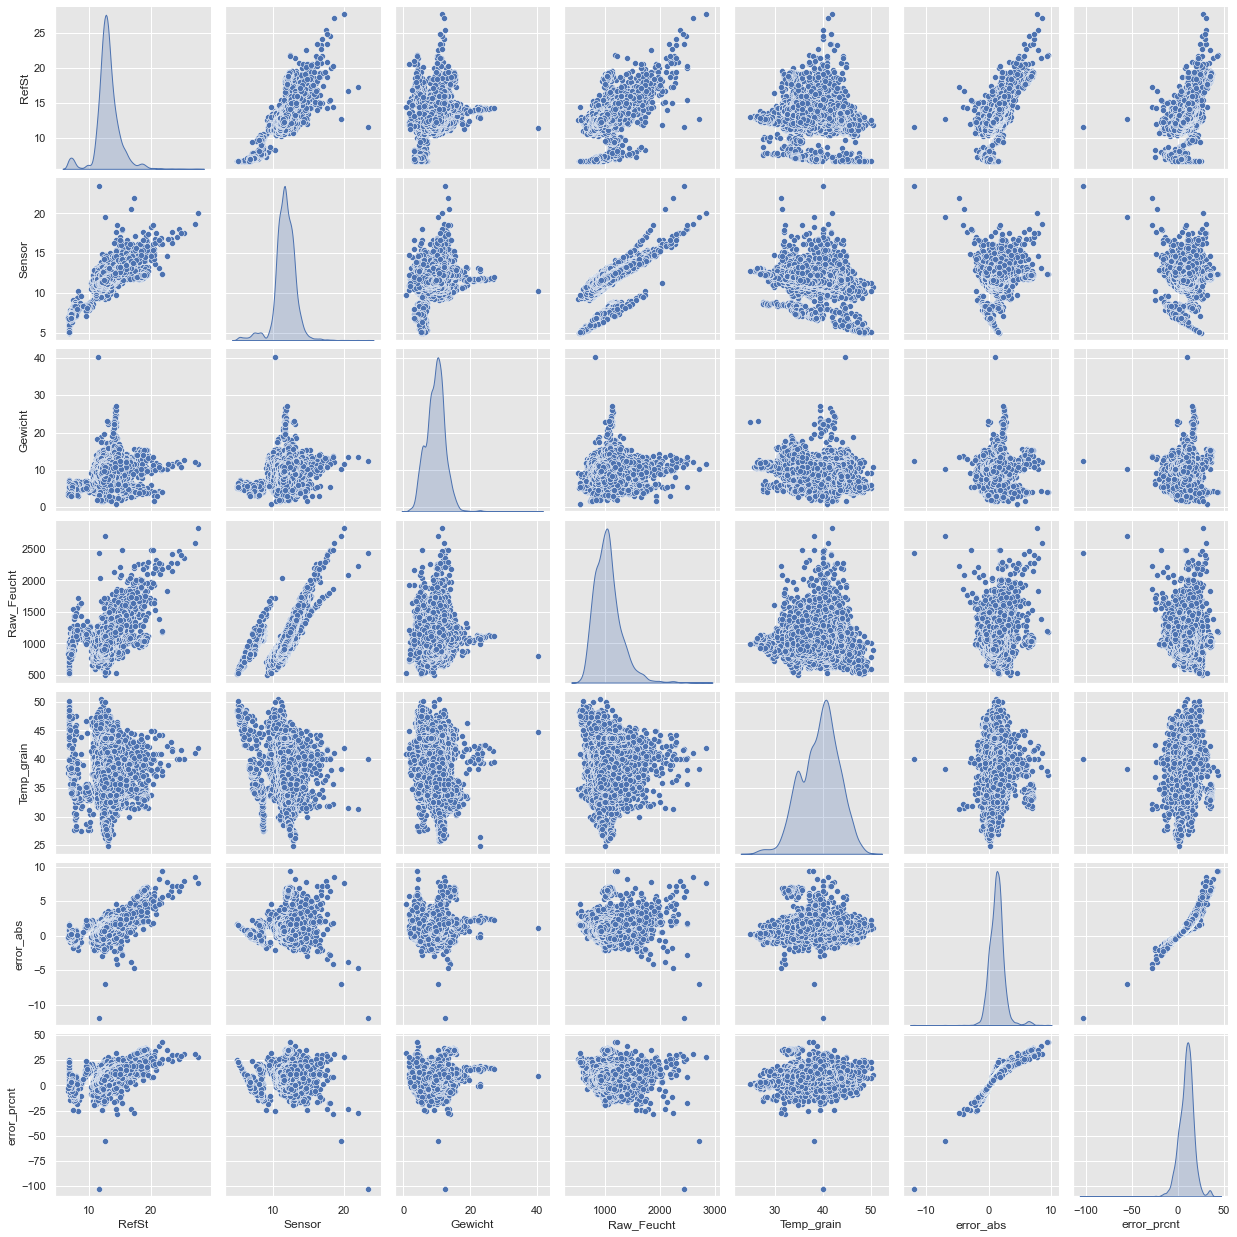

In [375]:

sns.pairplot(data=df, diag_kind='kde')
plt.show()

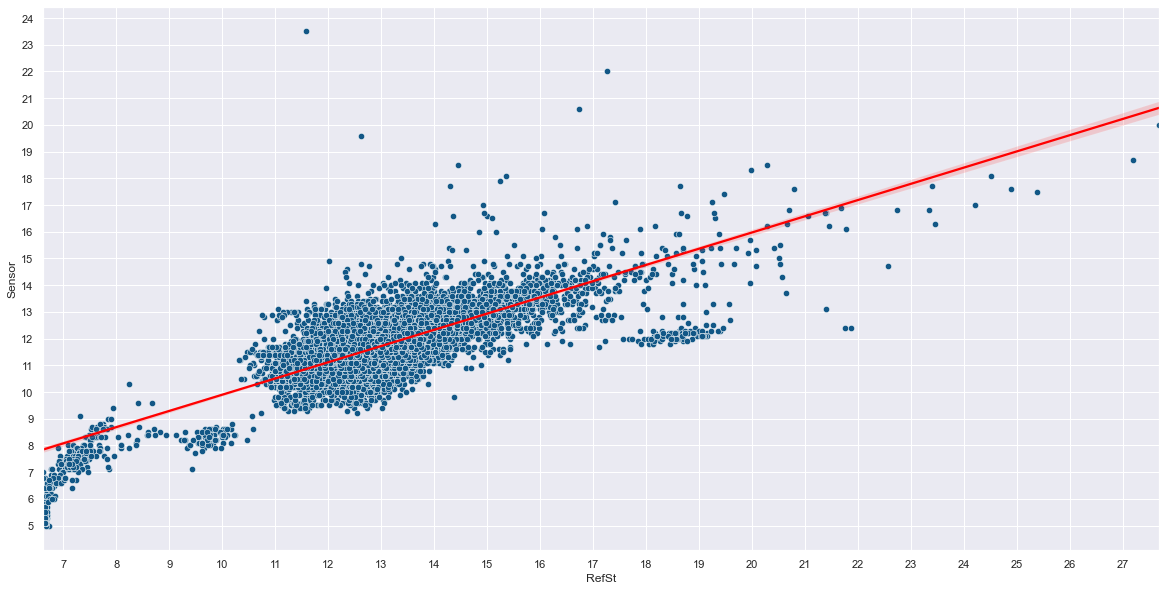

In [649]:
# RefSt vs. Sensor
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1)
ax.set_xticks(range(0,28))
ax.set_yticks(range(28))
sns.scatterplot(data=df, x='RefSt', y='Sensor', color='#125786', s=40)
sns.regplot(data=df, x="RefSt", y="Sensor", scatter=False, ax=ax, color="red")
plt.show()

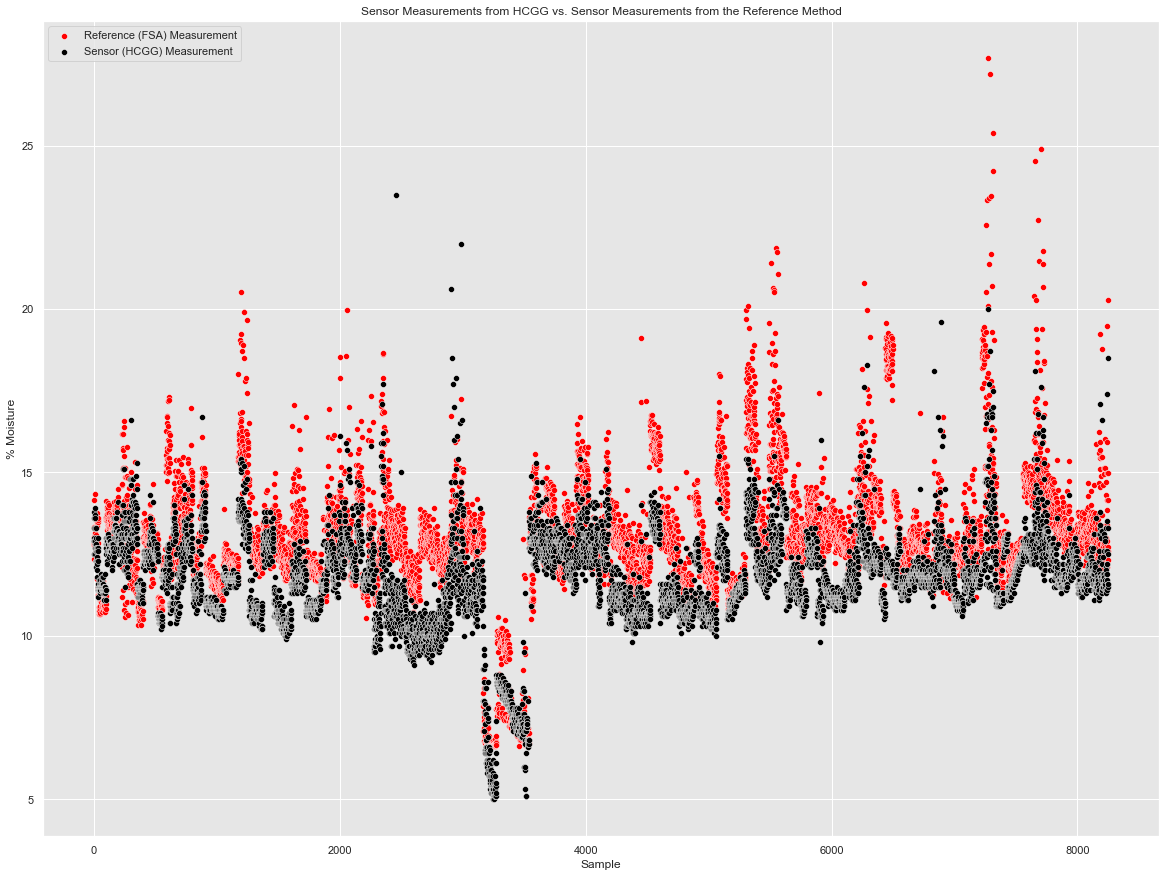

In [368]:

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(20,15))

ylim=(0,8251)
ax=sns.scatterplot(y="RefSt",x=range(0,8251),data=df, color="red") #RefSt
sns.scatterplot(y="Sensor",x=range(0,8251),data=df, color="black").set(title='Sensor Measurements from HCGG vs. Sensor Measurements from the Reference Method')
plt.legend(labels = ['Reference (FSA) Measurement', 'Sensor (HCGG) Measurement'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

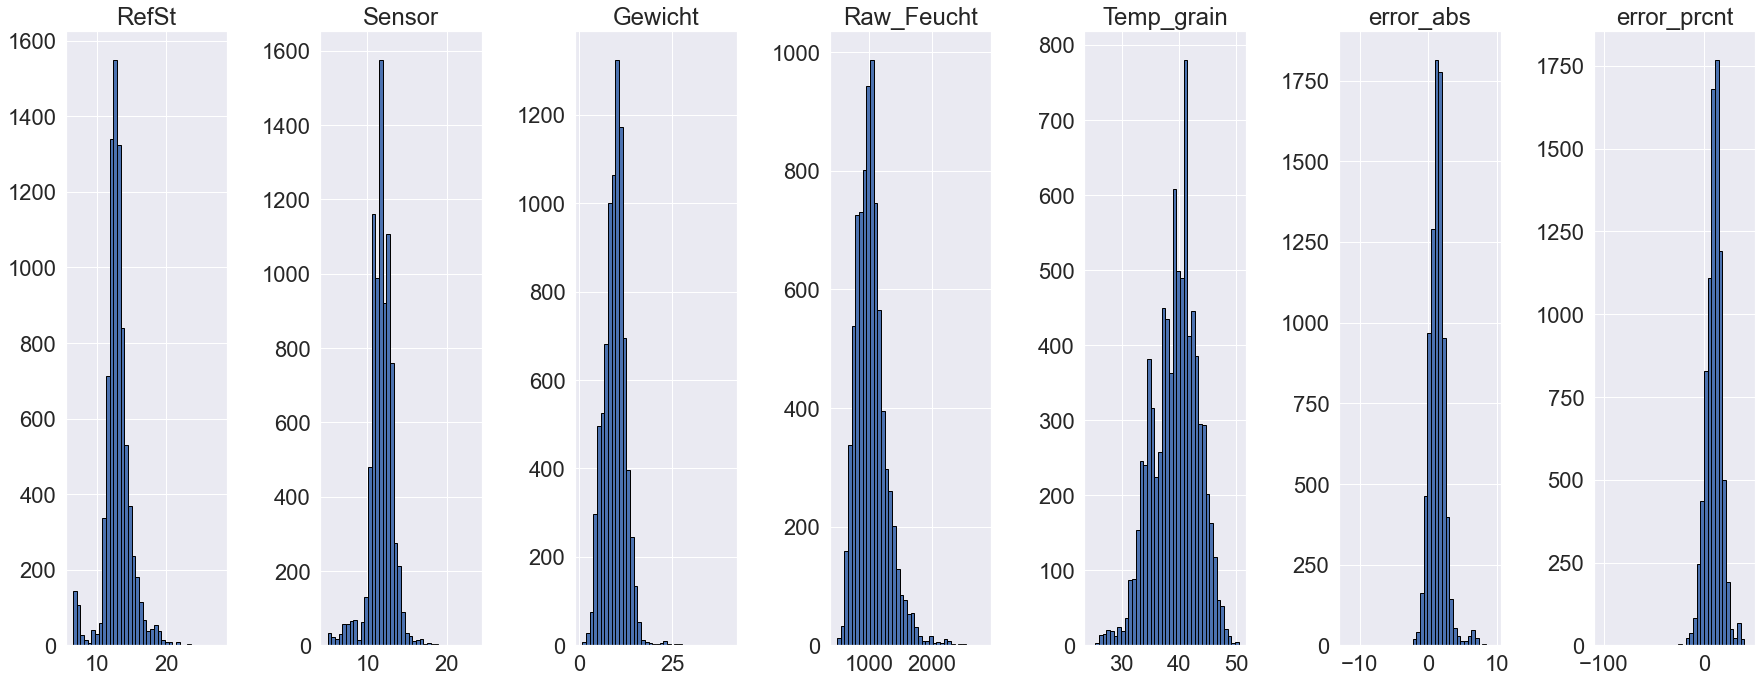

In [657]:
# Plots the histogram for each numerical feature in a separate subplot
sns.set(font_scale=2)
df.hist(bins=40, figsize=(25, 10), layout=(-1, 7), edgecolor="black")
plt.tight_layout()

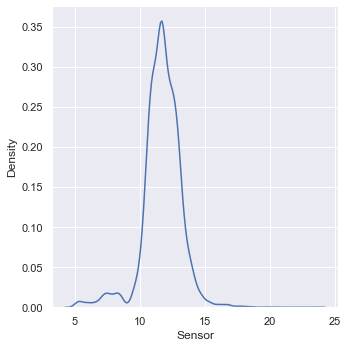

In [296]:
# Plots the PDF for each numerical feature in a separate subplot
sns.displot(df,x="Sensor",kind="kde")
#df.hist(bins=25, figsize=(30, 5), layout=(-1, 7), edgecolor="black")
plt.tight_layout()

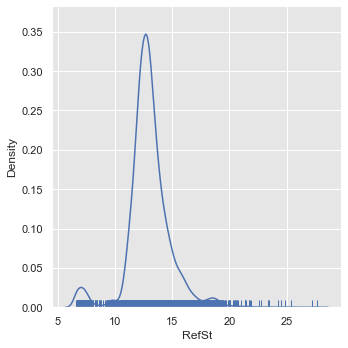

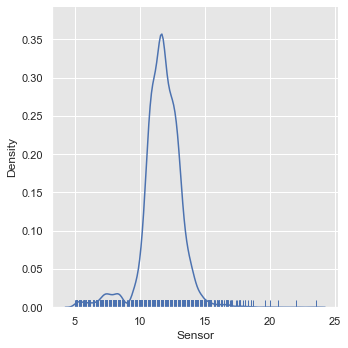

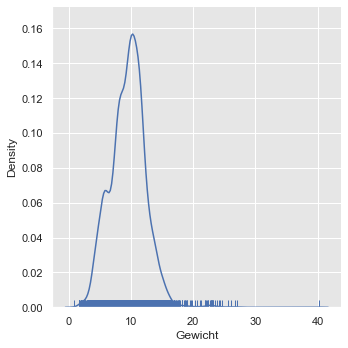

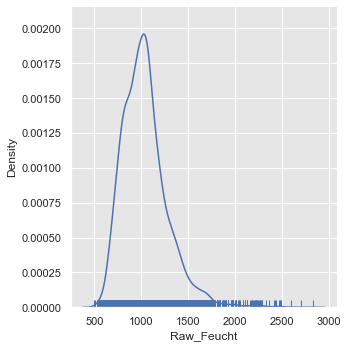

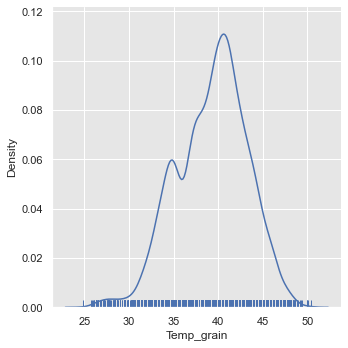

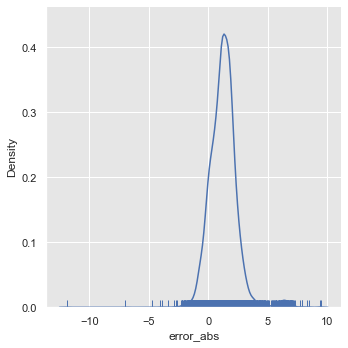

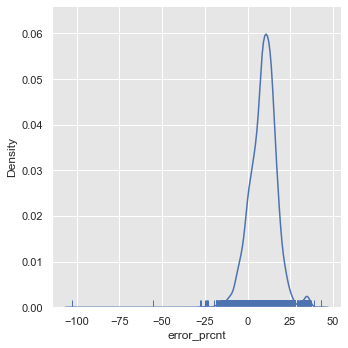

In [427]:
for column in df.select_dtypes(include='number'):
    sns.displot( x=column, data=df, kind="kde",rug=True)
    plt.tight_layout()


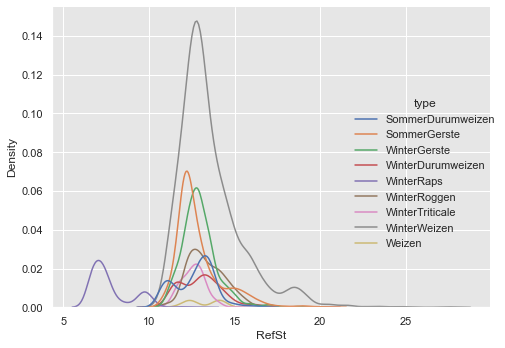

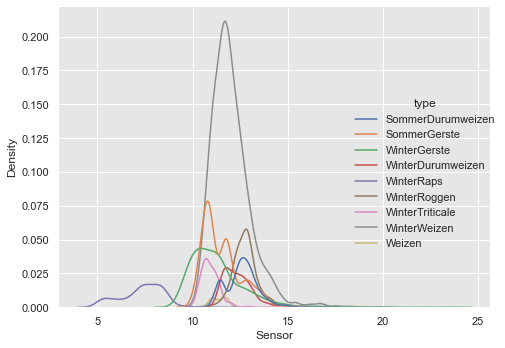

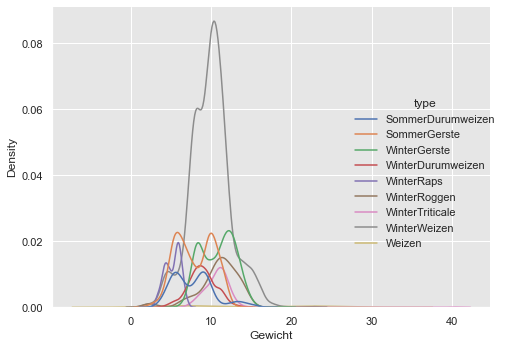

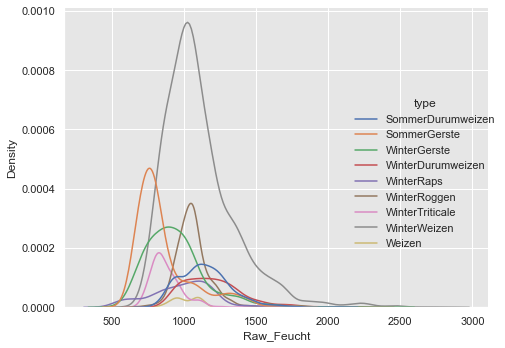

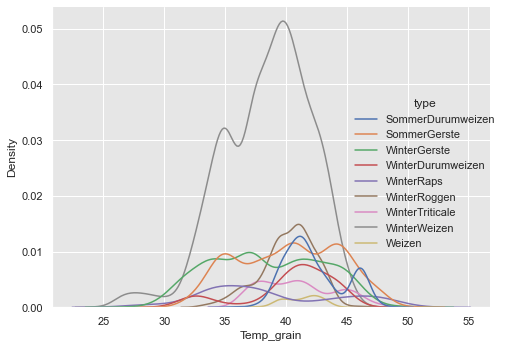

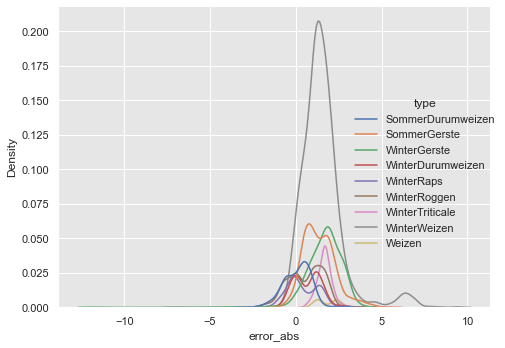

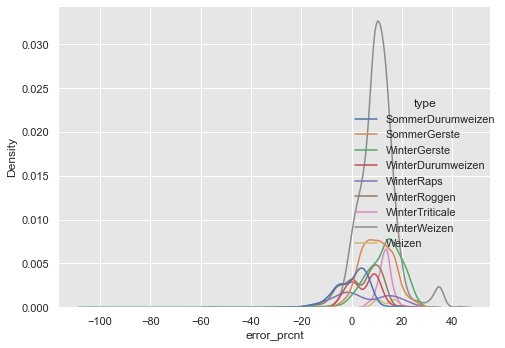

In [428]:
for column in df.select_dtypes(include='number'):
    sns.displot( x=column, data=df, kind="kde",hue="type")
    plt.tight_layout()

#### 3. Patterns

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [334]:
df.columns

Index(['RefSt', 'Sensor', 'Gewicht', 'Raw_Feucht', 'Temp_grain',
       'SommerDurumweizen', 'SommerGerste', 'Weizen', 'WinterDurumweizen',
       'WinterGerste', 'WinterRaps', 'WinterRoggen', 'WinterTriticale',
       'WinterWeizen', 'error_abs', 'error_prcnt', 'type'],
      dtype='object')

In [386]:
df_vif=df[['Sensor', 'Gewicht', 'Raw_Feucht', 'Temp_grain', 'error_abs', 'error_prcnt', 'type']]

In [387]:
# creating encoding for Type Column
df_vif['type'] = df_vif['type'].map({'SommerDurumweizen':1, 'SommerGerste':2,'Weizen':3, 'WinterDurumweizen':4,'WinterGerste':5, 'WinterRaps':6,'WinterRoggen':7, 'WinterTriticale':8,'WinterWeizen':9})

<ipython-input-387-b34b9570957c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vif['type'] = df_vif['type'].map({'SommerDurumweizen':1, 'SommerGerste':2,'Weizen':3, 'WinterDurumweizen':4,'WinterGerste':5, 'WinterRaps':6,'WinterRoggen':7, 'WinterTriticale':8,'WinterWeizen':9})


In [388]:
# Does Multicolinearity exist in the data?
#TO USE VIF!
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns

In [389]:
vif_data

feature
0       Sensor
1      Gewicht
2   Raw_Feucht
3   Temp_grain
4    error_abs
5  error_prcnt
6         type

In [390]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                   for i in range(len(df_vif.columns))]

In [391]:
#SEVERE MULTICOLINEARITY

vif_data

feature         VIF
0       Sensor  107.430430
1      Gewicht   15.668241
2   Raw_Feucht   45.146055
3   Temp_grain   48.532536
4    error_abs   45.109390
5  error_prcnt   50.971791
6         type    6.559297

In [663]:
df_vif=df[['RefSt','Sensor', 'Gewicht', 'Raw_Feucht', 'Temp_grain',  'type']]
# creating encoding for Type Column
df_vif['type'] = df_vif['type'].map({'SommerDurumweizen':1, 'SommerGerste':2,'Weizen':3, 'WinterDurumweizen':4,'WinterGerste':5, 'WinterRaps':6,'WinterRoggen':7, 'WinterTriticale':8,'WinterWeizen':9})


#Heatmap of the correlation
corrs = df_vif.corr()
corrs


<ipython-input-663-d0c60c97ea33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vif['type'] = df_vif['type'].map({'SommerDurumweizen':1, 'SommerGerste':2,'Weizen':3, 'WinterDurumweizen':4,'WinterGerste':5, 'WinterRaps':6,'WinterRoggen':7, 'WinterTriticale':8,'WinterWeizen':9})


RefSt    Sensor   Gewicht  Raw_Feucht  Temp_grain      type
RefSt       1.000000  0.789450  0.318353    0.598313   -0.148173  0.160599
Sensor      0.789450  1.000000  0.323745    0.718367   -0.222083  0.059221
Gewicht     0.318353  0.323745  1.000000    0.145600   -0.233067  0.237065
Raw_Feucht  0.598313  0.718367  0.145600    1.000000   -0.090279  0.198815
Temp_grain -0.148173 -0.222083 -0.233067   -0.090279    1.000000 -0.217195
type        0.160599  0.059221  0.237065    0.198815   -0.217195  1.000000

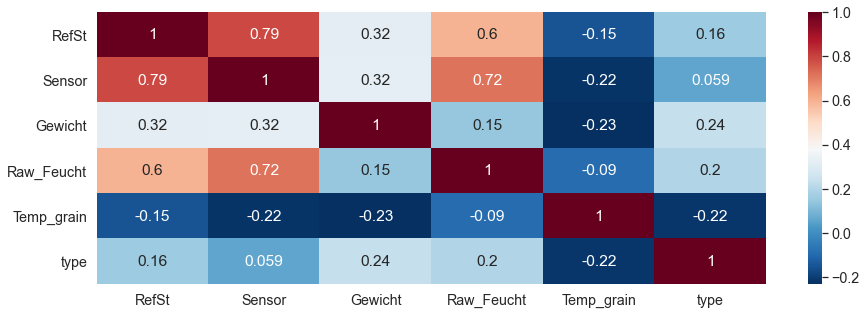

In [688]:
#RdBu_r
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corrs, cmap='RdBu_r',annot=True)
plt.show()

In [395]:
# Grouping of the data

df_vif.groupby('type').mean()

RefSt     Sensor    Gewicht   Raw_Feucht  Temp_grain  error_abs  \
type                                                                        
1     12.687901  12.586260   7.842118  1144.059160   42.292939   0.101641   
2     12.891058  11.528584   7.986766   859.488636   40.221503   1.362474   
3     13.197500  11.372059  13.900294  1010.000000   41.355882   1.825441   
4     13.092431  12.383102   8.897245  1199.956019   40.425231   0.709329   
5     12.954574  11.283224  10.865689   942.070291   38.435708   1.671350   
6      7.753844   7.357527   5.257742   989.787634   38.714516   0.396317   
7     13.329015  12.764154  10.991908  1054.707692   40.216462   0.564862   
8     12.631458  10.935417  10.822470   879.062500   41.013988   1.696042   
9     13.557736  12.025014   9.938330  1106.399945   38.433543   1.532723   

      error_prcnt  
type               
1        0.391921  
2       10.217335  
3       13.605462  
4        4.951622  
5       12.972493  
6        4.618183  
7        3.787561  
8       13.286608  
9       10.584607

In [443]:
# Grouping of the data

df.groupby('type').mean()

RefSt     Sensor    Gewicht   Raw_Feucht  Temp_grain  \
type                                                                          
SommerDurumweizen  12.687901  12.586260   7.842118  1144.059160   42.292939   
SommerGerste       12.891058  11.528584   7.986766   859.488636   40.221503   
Weizen             13.197500  11.372059  13.900294  1010.000000   41.355882   
WinterDurumweizen  13.092431  12.383102   8.897245  1199.956019   40.425231   
WinterGerste       12.954574  11.283224  10.865689   942.070291   38.435708   
WinterRaps          7.753844   7.357527   5.257742   989.787634   38.714516   
WinterRoggen       13.329015  12.764154  10.991908  1054.707692   40.216462   
WinterTriticale    12.631458  10.935417  10.822470   879.062500   41.013988   
WinterWeizen       13.557736  12.025014   9.938330  1106.399945   38.433543   

                   error_abs  error_prcnt  
type                                       
SommerDurumweizen   0.101641     0.391921  
SommerGerste        1.362474    10.217335  
Weizen              1.825441    13.605462  
WinterDurumweizen   0.709329     4.951622  
WinterGerste        1.671350    12.972493  
WinterRaps          0.396317     4.618183  
WinterRoggen        0.564862     3.787561  
WinterTriticale     1.696042    13.286608  
WinterWeizen        1.532723    10.584607

In [444]:
df.groupby('type').std()

RefSt    Sensor   Gewicht  Raw_Feucht  Temp_grain  \
type                                                                      
SommerDurumweizen  1.164390  0.816115  2.568827  177.805032    2.408622   
SommerGerste       1.376551  1.005312  2.327224  208.828478    4.146116   
Weizen             0.914982  0.378073  8.160214   85.350725    1.440914   
WinterDurumweizen  1.348772  0.784577  1.704619  213.478832    3.667388   
WinterGerste       1.037087  1.486332  2.103659  219.163726    4.537665   
WinterRaps         1.198547  1.100317  0.950696  226.218547    5.513444   
WinterRoggen       1.066817  0.637569  2.543481  108.997565    2.219494   
WinterTriticale    0.843049  0.496401  2.102107  121.245227    3.034097   
WinterWeizen       1.865544  1.052681  2.516880  253.888409    3.613658   

                   error_abs  error_prcnt  
type                                       
SommerDurumweizen   0.803024     6.247080  
SommerGerste        0.933107     6.178888  
Weizen              0.577363     3.460830  
WinterDurumweizen   0.815223     5.671119  
WinterGerste        1.055373     8.037030  
WinterRaps          0.869784    10.661909  
WinterRoggen        0.975195     7.239095  
WinterTriticale     0.478892     2.865516  
WinterWeizen        1.258013     7.000691

In [460]:
df.groupby('type').count().reset_index().sort_values(by='RefSt')


type  RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain  \
2             Weizen     68      68       68          68          68   
7    WinterTriticale    336     336      336         336         336   
5         WinterRaps    372     372      372         372         372   
3  WinterDurumweizen    432     432      432         432         432   
0  SommerDurumweizen    524     524      524         524         524   
6       WinterRoggen    650     650      650         650         650   
4       WinterGerste   1067    1067     1067        1067        1067   
1       SommerGerste   1144    1144     1144        1144        1144   
8       WinterWeizen   3658    3658     3658        3658        3658   

   SommerDurumweizen  SommerGerste  Weizen  WinterDurumweizen  WinterGerste  \
2                 68            68      68                 68            68   
7                336           336     336                336           336   
5                372           372     372                372           372   
3                432           432     432                432           432   
0                524           524     524                524           524   
6                650           650     650                650           650   
4               1067          1067    1067               1067          1067   
1               1144          1144    1144               1144          1144   
8               3658          3658    3658               3658          3658   

   WinterRaps  WinterRoggen  WinterTriticale  WinterWeizen  error_abs  \
2          68            68               68            68         68   
7         336           336              336           336        336   
5         372           372              372           372        372   
3         432           432              432           432        432   
0         524           524              524           524        524   
6         650           650              650           650        650   
4        1067          1067             1067          1067       1067   
1        1144          1144             1144          1144       1144   
8        3658          3658             3658          3658       3658   

   error_prcnt  
2           68  
7          336  
5          372  
3          432  
0          524  
6          650  
4         1067  
1         1144  
8         3658

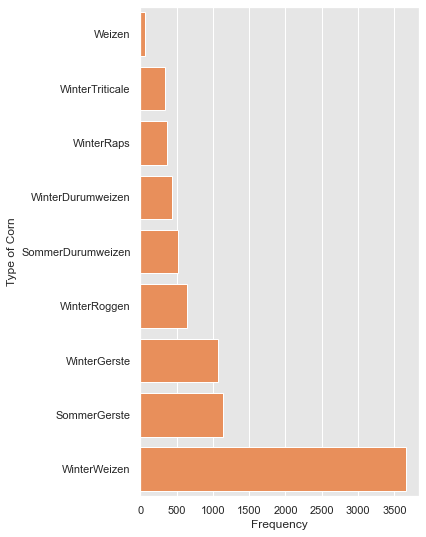

In [494]:
#Colors to make here: https://www.rgbtohex.net/rgb/255-137-68

#Frequency of Types in the DF

fig, ax = plt.subplots(figsize=(5,9))
sns.barplot(data=df.groupby('type').count().reset_index().sort_values(by='RefSt'), x='RefSt',y='type', color='#ff8944')
plt.xlabel("Frequency")
plt.ylabel("Type of Corn")
plt.show()

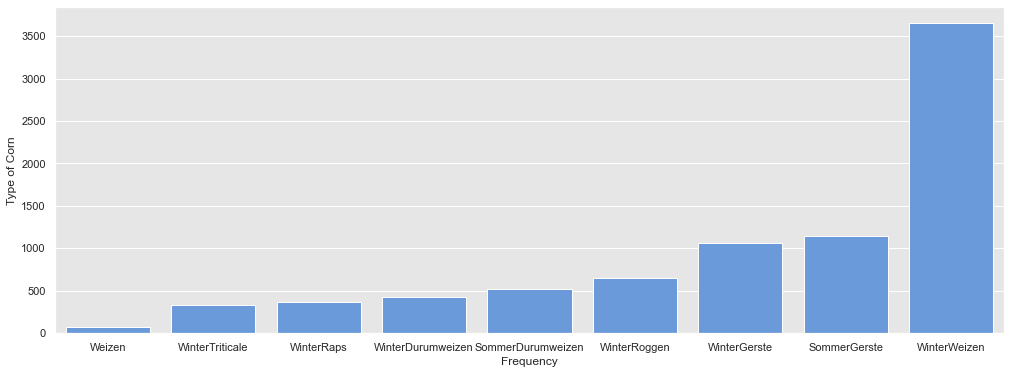

In [596]:
#Frequency of Types in the DF

fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(data=df.groupby('type').count().reset_index().sort_values(by='RefSt'), y='RefSt',x='type', color='#5797ec')
plt.xlabel("Frequency")
plt.ylabel("Type of Corn")
plt.show()

In [584]:
data=df.groupby('type').count().reset_index().sort_values(by='RefSt')
data['prcnt']=((data['RefSt'])/8251)*100
data

type  RefSt  Sensor  Gewicht  Raw_Feucht  Temp_grain  \
2             Weizen     68      68       68          68          68   
7    WinterTriticale    336     336      336         336         336   
5         WinterRaps    372     372      372         372         372   
3  WinterDurumweizen    432     432      432         432         432   
0  SommerDurumweizen    524     524      524         524         524   
6       WinterRoggen    650     650      650         650         650   
4       WinterGerste   1067    1067     1067        1067        1067   
1       SommerGerste   1144    1144     1144        1144        1144   
8       WinterWeizen   3658    3658     3658        3658        3658   

   SommerDurumweizen  SommerGerste  Weizen  WinterDurumweizen  WinterGerste  \
2                 68            68      68                 68            68   
7                336           336     336                336           336   
5                372           372     372                372           372   
3                432           432     432                432           432   
0                524           524     524                524           524   
6                650           650     650                650           650   
4               1067          1067    1067               1067          1067   
1               1144          1144    1144               1144          1144   
8               3658          3658    3658               3658          3658   

   WinterRaps  WinterRoggen  WinterTriticale  WinterWeizen  error_abs  \
2          68            68               68            68         68   
7         336           336              336           336        336   
5         372           372              372           372        372   
3         432           432              432           432        432   
0         524           524              524           524        524   
6         650           650              650           650        650   
4        1067          1067             1067          1067       1067   
1        1144          1144             1144          1144       1144   
8        3658          3658             3658          3658       3658   

   error_prcnt      prcnt  
2           68   0.824143  
7          336   4.072234  
5          372   4.508544  
3          432   5.235729  
0          524   6.350745  
6          650   7.877833  
4         1067  12.931766  
1         1144  13.864986  
8         3658  44.334020

#### ANOVA TEST

Null: Groups means are equal (no variation in group means)
Alt: At least one group mean is different from other groups


In [ ]:
from scipy import stats

<AxesSubplot:xlabel='type', ylabel='Sensor'>

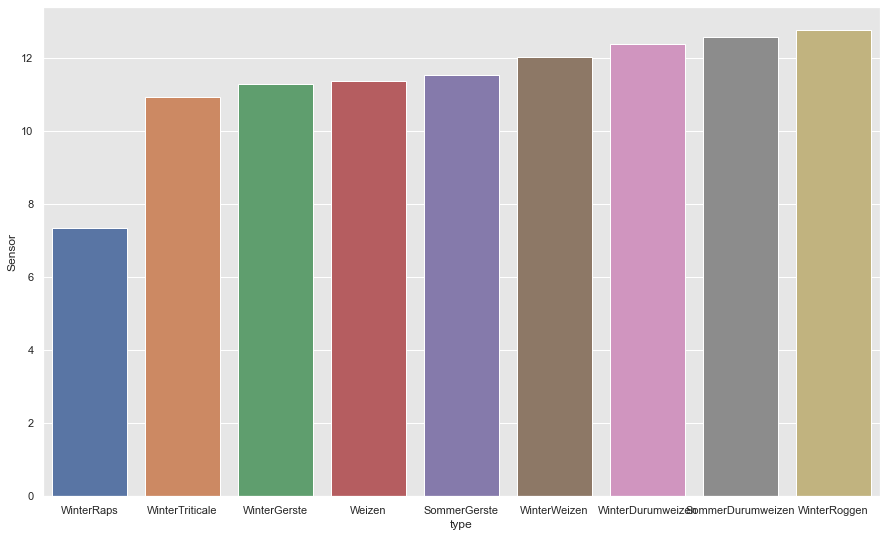

In [536]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(data=df.groupby('type').mean('Sensor').reset_index().sort_values('Sensor'), x='type',y='Sensor')


In [537]:
# ANOVA Test SENSOR

temp_df = df[['type','Sensor']].groupby(['type'])
temp_df.head(2)

type  Sensor
0     SommerDurumweizen    13.0
1     SommerDurumweizen    13.3
524        SommerGerste    10.6
525        SommerGerste    10.6
732        WinterGerste    14.6
733        WinterGerste    13.2
1847  WinterDurumweizen    11.4
1848  WinterDurumweizen    11.6
3167         WinterRaps    10.3
3168         WinterRaps     8.0
3539       WinterRoggen    13.5
3540       WinterRoggen    12.7
4189    WinterTriticale    10.4
4190    WinterTriticale    10.7
4525       WinterWeizen    13.6
4526       WinterWeizen    14.1
6402             Weizen    11.0
6403             Weizen    11.2

In [538]:
# Since variance between Sensor Readings between SommerDurumweizen and WinterRoggen is small we get a small pvalue
stats.f_oneway(temp_df.get_group('SommerDurumweizen')['Sensor'],temp_df.get_group('WinterRoggen')['Sensor'])

F_onewayResult(statistic=17.577869584417872, pvalue=2.965321609926873e-05)

In [539]:
stats.f_oneway(temp_df.get_group('WinterRoggen')['Sensor'],temp_df.get_group('WinterRaps')['Sensor'])

F_onewayResult(statistic=9894.156547695655, pvalue=0.0)

In [521]:
# ANOVA Test REFERENCE SENSOR

temp_df = df[['type','RefSt']].groupby(['type'])
temp_df.head(2)


type  RefSt
0     SommerDurumweizen  13.33
1     SommerDurumweizen  14.17
524        SommerGerste  10.88
525        SommerGerste  11.18
732        WinterGerste  13.53
733        WinterGerste  13.75
1847  WinterDurumweizen  11.52
1848  WinterDurumweizen  11.34
3167         WinterRaps   8.24
3168         WinterRaps   7.10
3539       WinterRoggen  13.51
3540       WinterRoggen  12.96
4189    WinterTriticale  12.18
4190    WinterTriticale  12.94
4525       WinterWeizen  16.46
4526       WinterWeizen  16.27
6402             Weizen  12.26
6403             Weizen  12.72

<AxesSubplot:xlabel='type', ylabel='RefSt'>

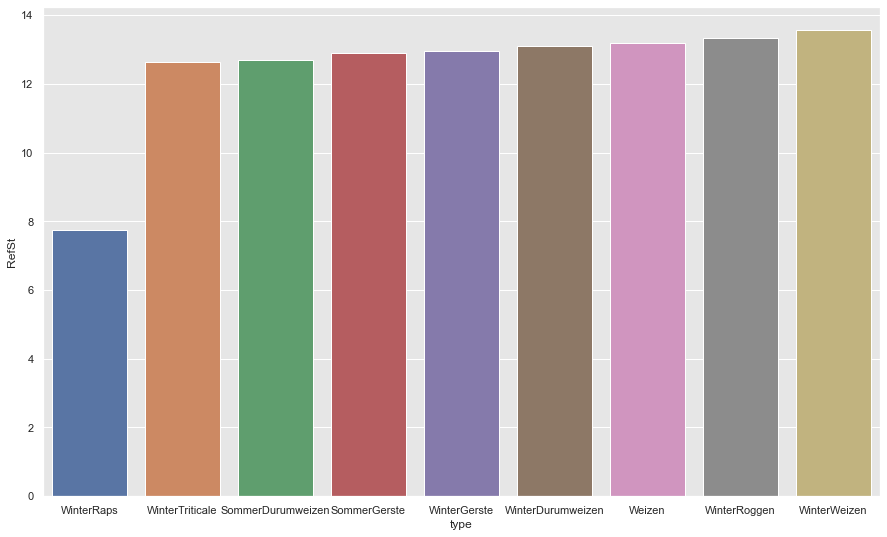

In [522]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(data=df.groupby('type').mean('RefSt').reset_index().sort_values('RefSt'), x='type',y='RefSt')


In [523]:
# Since variance between Sensor Readings between SommerDurumweizen and WinterRoggen is small we get a small pvalue
stats.f_oneway(temp_df.get_group('SommerDurumweizen')['RefSt'],temp_df.get_group('WinterRoggen')['RefSt'])

F_onewayResult(statistic=96.53692230584402, pvalue=6.001562355945839e-22)

In [524]:
stats.f_oneway(temp_df.get_group('WinterRoggen')['RefSt'],temp_df.get_group('WinterRaps')['RefSt'])

F_onewayResult(statistic=5899.03335937249, pvalue=0.0)

In [525]:
stats.f_oneway(temp_df.get_group('WinterWeizen')['RefSt'],temp_df.get_group('WinterRaps')['RefSt'])

F_onewayResult(statistic=3455.0820528643035, pvalue=0.0)

In [527]:
stats.f_oneway(temp_df.get_group('WinterWeizen')['RefSt'],temp_df.get_group('WinterRoggen')['RefSt'])

F_onewayResult(statistic=9.232765292559629, pvalue=0.002391489448198086)

In [555]:
# Is the assumption for ANOVA given? Normality Assumption Check

# Source: https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

In [545]:
import scipy.stats as stats

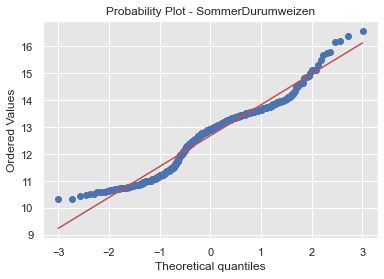

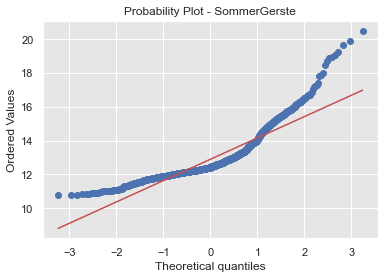

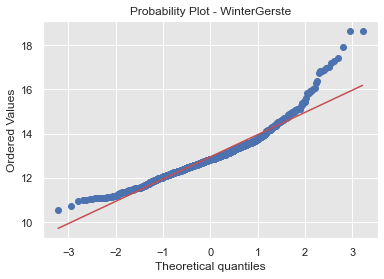

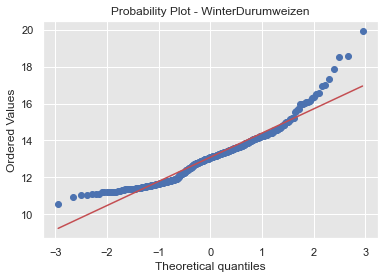

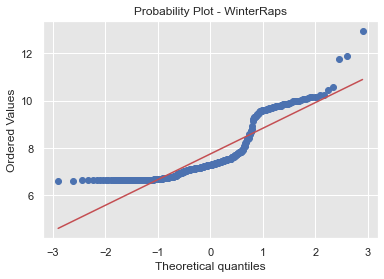

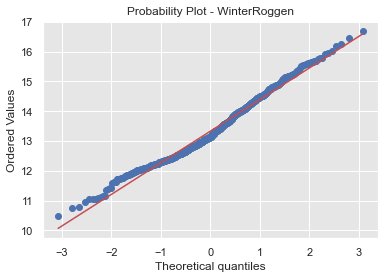

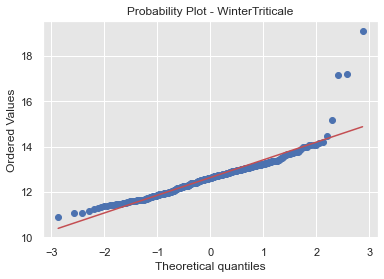

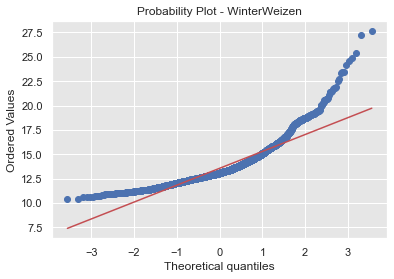

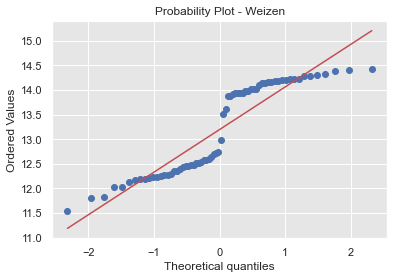

In [546]:
unique_majors = df['type'].unique()
for major in unique_majors:
    stats.probplot(df[df['type'] == major]['RefSt'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

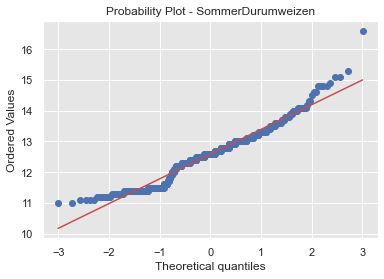

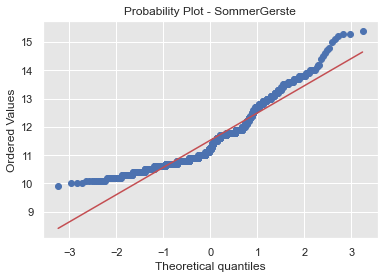

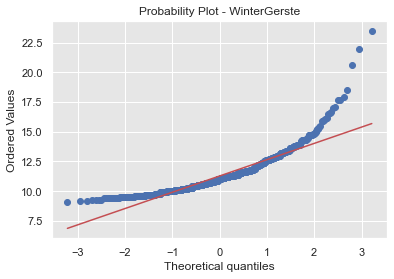

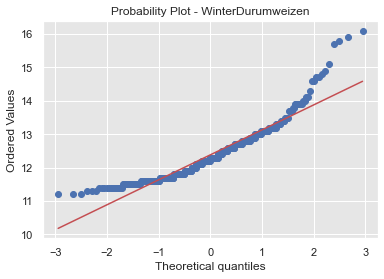

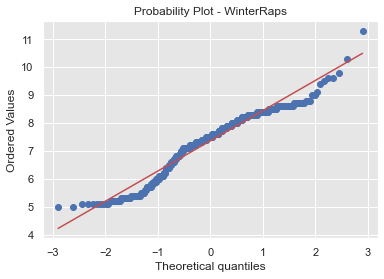

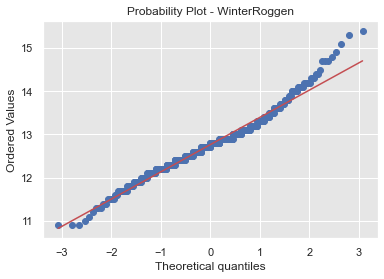

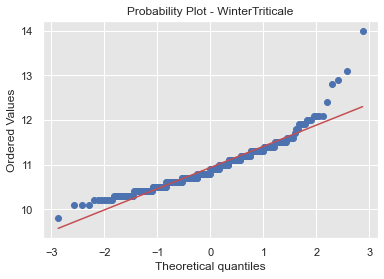

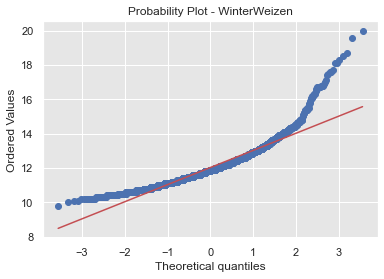

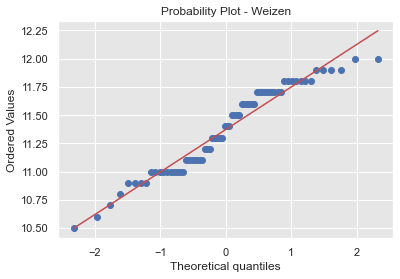

In [547]:
unique_majors = df['type'].unique()
for major in unique_majors:
    stats.probplot(df[df['type'] == major]['Sensor'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [549]:
# Is the assumption for ANOVA given? Homogeneity of variance Assumption Check

# calculate ratio of the largest to the smallest sample standard deviation
ratio = df.groupby('type').std().max() / df.groupby('type').std().min()
ratio

RefSt          2.212854
Sensor         3.931340
Gewicht        8.583413
Raw_Feucht     2.974649
Temp_grain     3.826351
error_abs      2.626922
error_prcnt    3.720764
dtype: float64

In [4]:
print("25.10.2022")
print("B")

25.10.2022
B
